Step 1: Install Required Libraries

In [4]:
pip install pandas matplotlib seaborn numpy


  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Step 2: Import Required Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Step 3: Load the Dataset

In [6]:
df = pd.read_csv(r"C:\Users\91822\OneDrive\Desktop\Oasis Infobyte\Oasis-Infobyte\Project 2\Unemployment in India.csv")

# Check the first few rows of the dataset
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


Step 4: Explore the Dataset

In [11]:
# Check the dataset structure
df.info()

# Descriptive statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


Step 5: Data Cleaning

In [12]:
# Check for missing values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [17]:
df[' Date'] = pd.to_datetime(df[' Date'])

C:\Users\91822\AppData\Local\Temp\ipykernel_20384\1649268658.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    740 non-null    object        
 1    Date                                     740 non-null    datetime64[ns]
 2    Frequency                                740 non-null    object        
 3    Estimated Unemployment Rate (%)          740 non-null    float64       
 4    Estimated Employed                       740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


Step 6: Data Visualization

In [21]:
# List all columns in the dataset
print(df.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


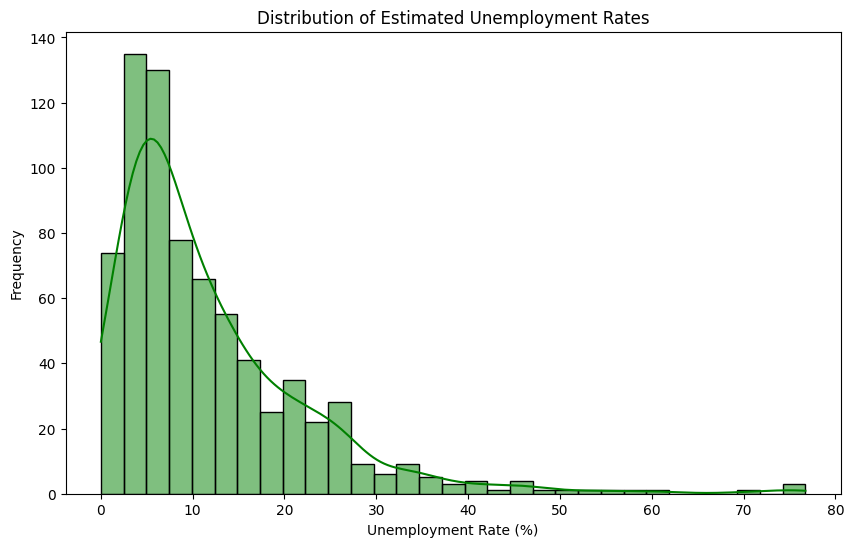

In [26]:
# Distribution plot of estimated unemployment rates
plt.figure(figsize=(10,6))
sns.histplot(df[' Estimated Unemployment Rate (%)'], kde=True, color="green")
plt.title("Distribution of Estimated Unemployment Rates")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()


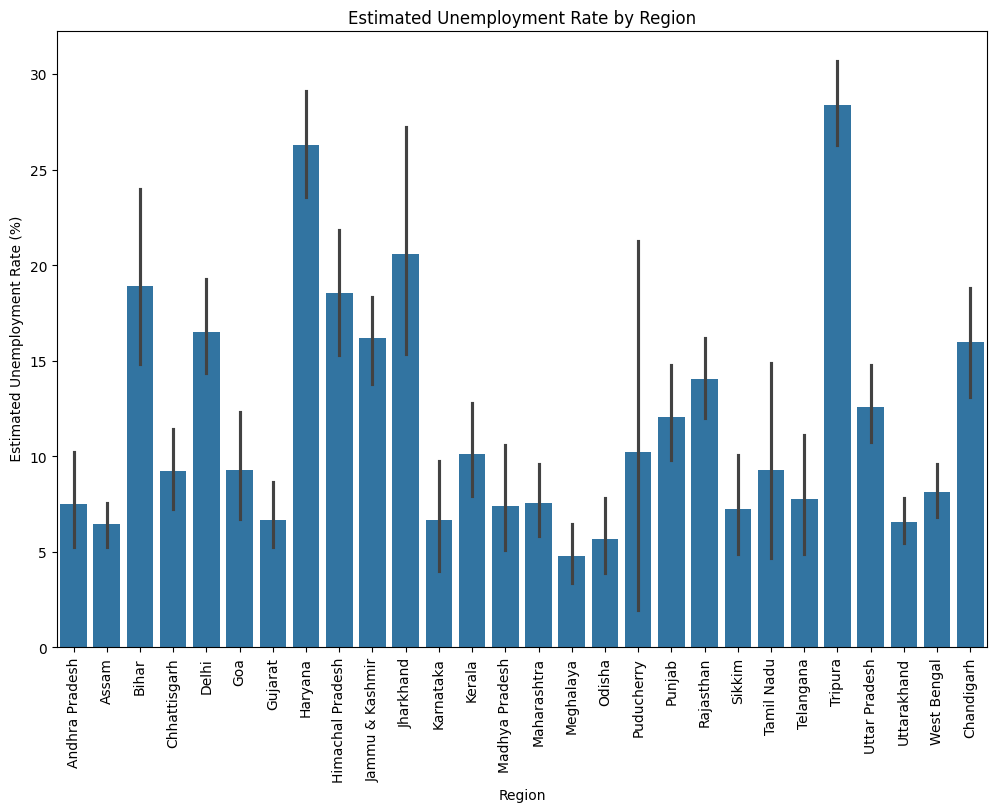

In [28]:
# Bar plot for region-wise unemployment rate
plt.figure(figsize=(12,8))
sns.barplot(x="Region", y=" Estimated Unemployment Rate (%)", data=df)
plt.title("Estimated Unemployment Rate by Region")
plt.xticks(rotation=90)
plt.show()


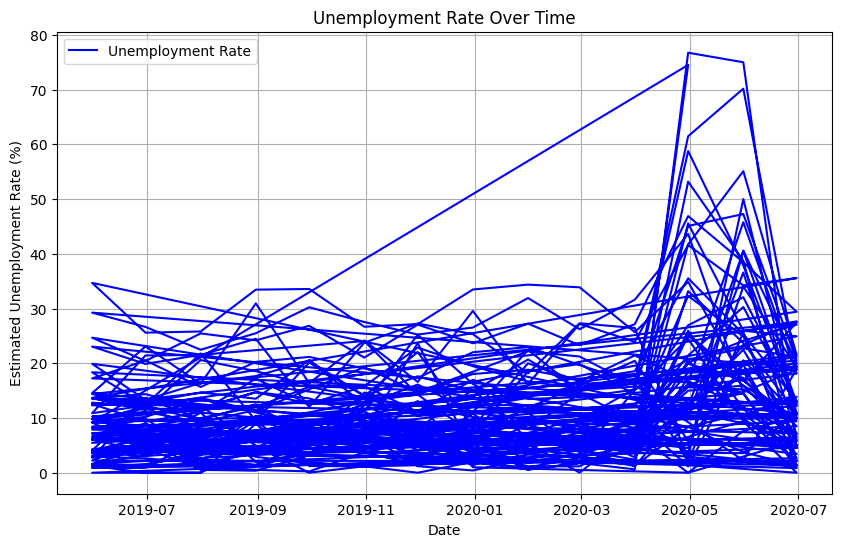

In [33]:
# Line plot of unemployment rate over time
plt.figure(figsize=(10,6))
plt.plot(df[' Date'], df[' Estimated Unemployment Rate (%)'], label="Unemployment Rate", color='blue')
plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.grid(True)
plt.legend()
plt.show()


Step 7: Analyzing Specific Time Periods (e.g., COVID-19)

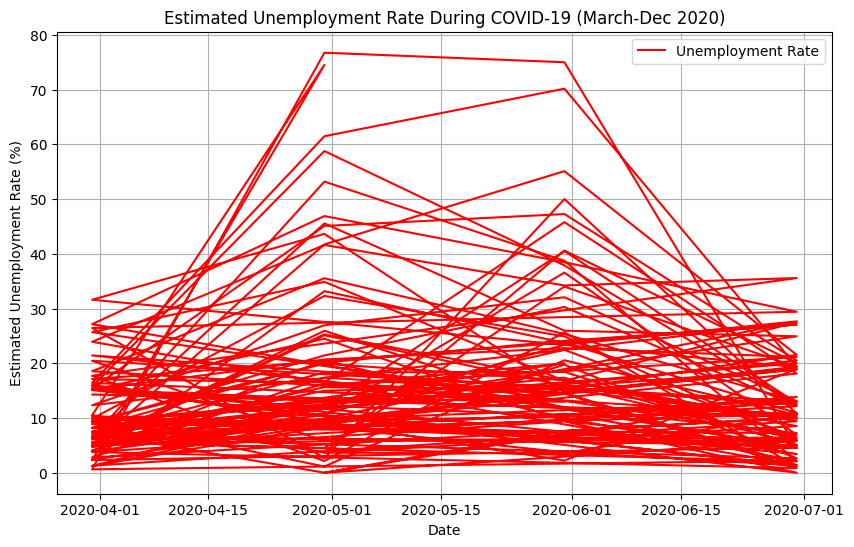

In [31]:
# Filter data for a specific time period (e.g., March 2020 to December 2020)
covid_period = df[(df[' Date'] >= '2020-03-01') & (df[' Date'] <= '2020-12-31')]

# Plot unemployment rate during COVID-19
plt.figure(figsize=(10,6))
plt.plot(covid_period[' Date'], covid_period[' Estimated Unemployment Rate (%)'], label="Unemployment Rate", color='red')
plt.title("Estimated Unemployment Rate During COVID-19 (March-Dec 2020)")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.grid(True)
plt.legend()
plt.show()


Before and After COVID-19 Unemployment Rate

C:\Users\91822\AppData\Local\Temp\ipykernel_20384\3858497611.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Period', y='Average Unemployment Rate (%)', data=covid_comparison, palette='Blues')


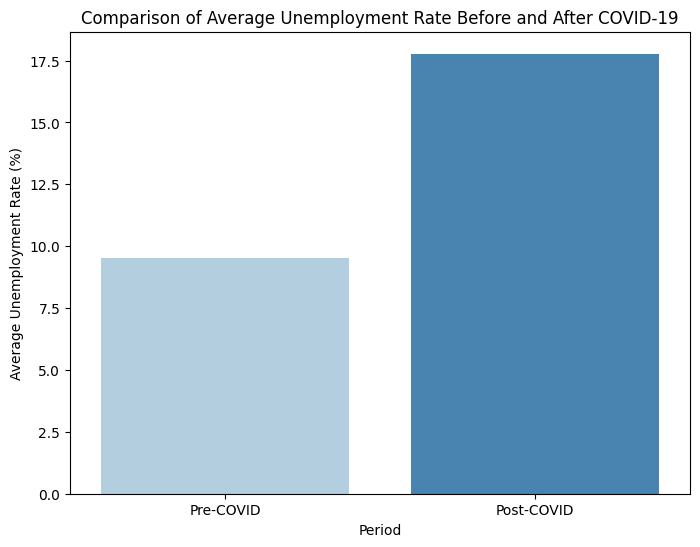

In [35]:
# Define the pre-COVID and post-COVID periods
pre_covid = df[df[' Date'] < '2020-03-01']
post_covid = df[df[' Date'] >= '2020-03-01']

# Calculate the average unemployment rate for both periods
avg_pre_covid = pre_covid[' Estimated Unemployment Rate (%)'].mean()
avg_post_covid = post_covid[' Estimated Unemployment Rate (%)'].mean()

# Create a DataFrame for visualization
covid_comparison = pd.DataFrame({
    'Period': ['Pre-COVID', 'Post-COVID'],
    'Average Unemployment Rate (%)': [avg_pre_covid, avg_post_covid]
})

# Bar plot to compare pre-COVID and post-COVID unemployment rates
plt.figure(figsize=(8,6))
sns.barplot(x='Period', y='Average Unemployment Rate (%)', data=covid_comparison, palette='Blues')
plt.title('Comparison of Average Unemployment Rate Before and After COVID-19')
plt.ylabel('Average Unemployment Rate (%)')
plt.xlabel('Period')
plt.show()
